# <span style="color:red"> Laboratorio di Simulazione Numerica (LSN) </span>
## <span style="color:green"> Esercitazione Numerica #05</span>

All'interno della quinta esercitazione del corso, abbiamo avuto modo di introdurre il concetto di catena di Markov discreta e, in particolare, abbiamo trattato una sua applicazione all'interno dell'**Algoritmo di Metropolis**: un processo stocastico di Markov basato su *tecniche di rigetto*, che vengono a dipendere da una matrice di trasferimento $T(y|x)$ ($i.e.$ elemento di matrice associato alla probabilità di arrivare in $y$ partendo da $x$), attraverso la seguente *funzione di accettazione*.

$$A(x|y) = min \left[ 1, \frac{T(y|x)p(x)}{T(x|y)p(y)} \right]$$

dove $p(x)$ rappresenta la distribuzione di probabilità che si desidera campionare. Come abbiamo visto a lezione, la scelta della matrice di trasferimento può rappresentare un aspetto cruciale per il corretto funzionamento dell'algoritmo di Metropolis. Di solito, quello che si fa, è fissare la funzione di transizione $T(y|x)$ in modo da ottenere una probabilità di accettazione di circa il 50% (*50% empirical “rule”*). Questa condizione permette infatti di minimizzare l'autocorrelazione tra due misure estratte in successione, senza però ridurre in maniera eccessiva l'efficienza dell'algoritmo. Tornando all'espressione riportata sopra, possiamo dedurre un'interessante proprietà dell'algoritmo di Metropolis: non è necessario conoscere la costante di normalizzazione per $p(x)$, in quanto questa si semplifica comparendo sia al numeratore che al denominatore.
Nonostante la sua apparente semplicità, durante l'esercitazione, abbiamo potuto sperimentare, anche se in maniera molto superficiale, la potenza e l'efficienza di questa tecnica nel campionare distribuzioni di probabilità generiche.

### <span style="color:darkorange"> Esercizio 05.1</span>

L'esercizio consisteva nel campionamento di particolari distribuzioni di probabilità, ottenute a partire dalle funzioni d'onda degli autostati energetici dell'elettrone all'interno dell'atomo di idrogeno. Nel dettaglio, ci siamo concentrati su due orbitali atomci:

- Stato fondamentale ($n=1$, $l=0$, $m=0$):
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$

- Stato eccitato ($n=2$, $l=1$, $m=0$):
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$

dove $n$, $l$ e $m$ sono i numeri quantici orbitali che descrivono in modo esaustivo (a meno dello spin) lo stato del sistema, mentre $a_0$ è il raggio di Bohr. Per testare la validità dell'algoritmo di Metropolis e in particolare la sua indipenza rispetto alla matrice di trasferimento scelta, abbiamo implementato due matrici di trasferimento differenti: una uniforme e l'altra gaussiana. Entrambe costruite, fissando rispettivamente lunghezza dello step e larghezza della campana, in modo da raggiungere un'accettazione di circa il 50%. Osserviamo inoltre che le due probabilità di transizione adottate risultano simmetriche, $i.e.$ $T(\vec{x_1}|\vec{x_2}) = T(\vec{x_2}|\vec{x_1})$, di conseguenza vediamo come l'accettazione del Metropolis si riduca a

$$A(x_2|x_1) = min \left[ 1, \frac{p(\vec{x_2})}{p(\vec{x_1})} \right]$$

Partiamo col descrivere il caso uniforme.
Una volta campionate le distribuzioni di probabilità $|\Psi_{1,0,0}(x,y,z)|^2$ e $|\Psi_{2,1,0}(x,y,z)|^2$, in coordinate cartesiane, ho potuto stimare i valori medi del raggio orbitale $\left\langle r \right\rangle$ nei due casi. Di seguito sono riportati i valori attesi, calcolati per via analitica, di tali quantità.

$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$

Chiaramente prima di procedere con la misura diretta di queste grandezze, è stato necessario equilibrare il sistema, ovvero fare in modo che l'algoritmo di Metropolis implementato nel codice fosse in grado di campionare in modo sufficientemente preciso le distribuzioni di probabilità designate. Questa condizione poteva venir soddisfatta solo dopo aver eseguito un numero adeguato di step di simulazione, dipendente, ovviamente, dalla scelta del punto iniziale della catena. Raggiunto l'equilibrio, ho generato un campione di $M=10^6$ variabili $r$ distribuite secondo le due distribuzioni di probailità. Da queste, ho potuto calcolare il valor medio del raggio orbitale, accompagnato dalla rispettiva incertezza statistica, applicando il metodo a blocchi con $N_{blk} = 100$. Nello specchietto Python sottostante sono riportati i risultati ottenuti per $\left\langle r \right\rangle$ in funzione del numero dei blocchi utilizzati durante la simulazione.

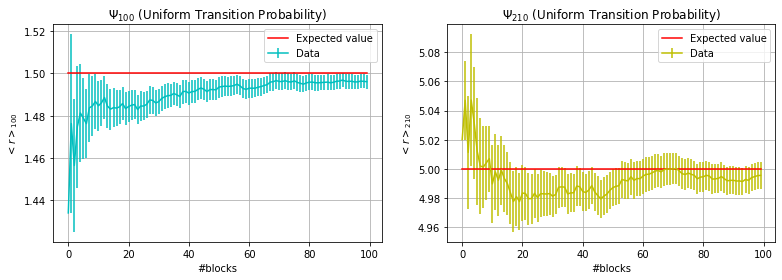

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

nblocks=100
x = np.arange(nblocks)
real = np.zeros(nblocks)

mean_UNIF100,err_UNIF100 = np.loadtxt("Esercizio5.2/unif100.txt", usecols=(0,1), delimiter=' ', unpack='true')
mean_UNIF210,err_UNIF210 = np.loadtxt("Esercizio5.2/unif210.txt", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(x,mean_UNIF100,err_UNIF100,color='c',label='Data')
plt.xlabel('#blocks')
plt.ylabel('$<r>_{100}$')
plt.title('$\Psi_{100}$ (Uniform Transition Probability)')
plt.grid(True)
plt.plot(x,real+1.5,color='r',label='Expected value')
plt.legend()

plt.subplot(132)
plt.errorbar(x,mean_UNIF210,err_UNIF210,color='y',label='Data')
plt.xlabel('#blocks')
plt.ylabel('$<r>_{210}$')
plt.title('$\Psi_{210}$ (Uniform Transition Probability)')
plt.grid(True)
plt.plot(x,real+5,color='r',label='Expected value')
plt.legend()

plt.show()

Come si osserva dai plot, i risultati della simulazione sono in perfetto accordo con i valori teorici attesi.

Per quanto riguarda invece il campionamento attraverso una matrice di trasferimento gaussiano, ho seguito i medesimi passaggi descritti sopra: una volta equilibrato il sistema, ho potuto calcolare i valori medi del raggio orbitale applicando il $BM$. I risultati ottenuti sono riportati di seguito.

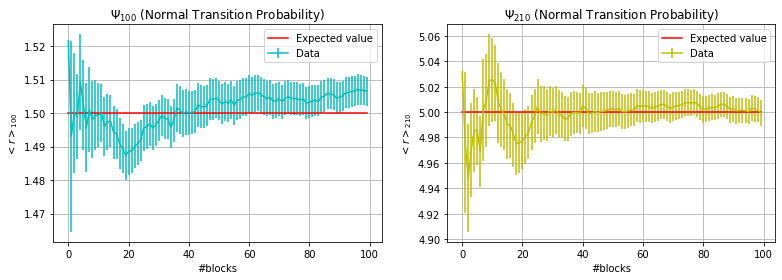

In [3]:
mean_GAUSS100,err_GAUSS100 = np.loadtxt("Esercizio5.2/gauss100.txt", usecols=(0,1), delimiter=' ', unpack='true')
mean_GAUSS210,err_GAUSS210 = np.loadtxt("Esercizio5.2/gauss210.txt", usecols=(0,1), delimiter=' ', unpack='true')

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.errorbar(x,mean_GAUSS100,err_GAUSS100,color='c',label='Data')
plt.xlabel('#blocks')
plt.ylabel('$<r>_{100}$')
plt.title('$\Psi_{100}$ (Normal Transition Probability)')
plt.grid(True)
plt.plot(x,real+1.5,color='r',label='Expected value')
plt.legend()

plt.subplot(132)
plt.errorbar(x,mean_GAUSS210,err_GAUSS210,color='y',label='Data')
plt.xlabel('#blocks')
plt.ylabel('$<r>_{210}$')
plt.title('$\Psi_{210}$ (Normal Transition Probability)')
plt.grid(True)
plt.plot(x,real+5,color='r',label='Expected value')
plt.legend()

plt.show()

Analogamente al caso precedente, i risultati della simulazione convergono verso i valori teorici attesi, permettendoci allo stesso tempo di verificare l'indipendenza dell'algoritmo di Metropolis dalla scelta della matrice di transizione. 

Infine, per concludere, ho voluto plottare su di un piano cartesiano 3D le posizioni dei punti campionati durante la simulazione, ovviamente in condizioni di equilibrio. Nello specifico ho utilizzato i dati ottenuti fissando una matrice di trasferimento uniforme anche se, come detto sopra, il risultato sarebbe stato identico utilizzando una probabilità di transizione gaussiana.

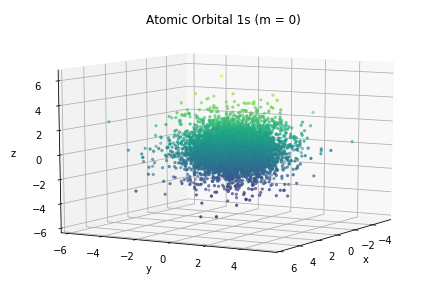

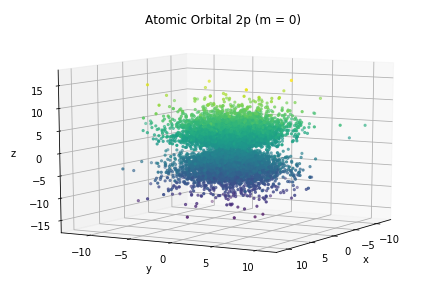

In [4]:
from mpl_toolkits.mplot3d import Axes3D

M=1000
X100,Y100,Z100=np.loadtxt("Esercizio5.2/orbital100.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
X210,Y210,Z210=np.loadtxt("Esercizio5.2/orbital210.txt", usecols=(0,1,2), delimiter=' ', unpack='true')

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X100, Y100, Z100, c=Z100, marker='.')
ax.set_title('Atomic Orbital 1s (m = 0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X210, Y210, Z210, c=Z210, marker='.')
ax.set_title('Atomic Orbital 2p (m = 0)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

I plot ottenuti ci permettono di apprezzare quella che è la forma attesa dei due orbitali atomici presi in considerazione: $1s$ $(m=0)$ e $2p$ $(m=0)$. Si vede infatti come l'orbitale associato allo stato fondamentale possieda la proprietà di simmetria sferica attesa dall'espressione della funzione d'onda ad esso associata, la quale dipende unicamente dal raggio $r$. Considerando invece stati con $l \neq 0$, è possibile osservare la rottura di tale simmetria dovuta alla presenza del termine centrifugo all'interno dell'Hamiltoniana. In particolare, dal secondo plot possiamo vedere come l'assenza di termini di accoppiamento, $e.g.$ interazione con campo magnetico esterno, consenta di mantenere una simmetria assiale lungo l'asse z, associata alla degenerazione dei livelli energetici rispetto al numero quantico $m$ (autovalore dell'operatore $\hat{L}_z$ in unità di $\hbar$).